# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Traffic Light Recognition Classifier



---
## Step 0: Load The Data

In [1]:
import sys
import csv
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

training_file = "train.p"

#csv_files=['daySequence1', 'daySequence2']
csv_files=['daySequence1',
           'daySequence2',
           'dayTrain/dayClip1',
           'dayTrain/dayClip2',
           'dayTrain/dayClip3',
           'dayTrain/dayClip4',
           'dayTrain/dayClip5',
           'dayTrain/dayClip6',
           'dayTrain/dayClip7',
           'dayTrain/dayClip8',
           'dayTrain/dayClip9',
           'dayTrain/dayClip10',
           'dayTrain/dayClip11',
           'dayTrain/dayClip12',
           'dayTrain/dayClip13']

path_prefix='lisa-traffic-light-dataset/Annotations/Annotations/'
path_postfix='/frameAnnotationsBOX.csv'

def frame_name(pre, seq):
    sp = pre.split('/')
    if (len(sp)==1):
        return 'lisa-traffic-light-dataset/'+pre+'/'+pre+'/frames/'+pre+('--%05d.jpg'%seq)
    else:
        return 'lisa-traffic-light-dataset/'+sp[0]+'/'+sp[0]+'/'+sp[1]+'/frames/'+sp[1]+('--%05d.jpg'%seq)


#samples = []
#reload_images = True
reload_images = False
if reload_images:
    images=[]
    labels=[]

    for csv_file in csv_files:
        with open(path_prefix+csv_file+path_postfix, 'r') as f:
            reader = csv.reader(f, delimiter=';')
            next(reader) # skip header
            count=0
            for row in reader:
                annot = [csv_file]
                annot.append(row[7])
                annot.extend(row[1:6])
                #print (frame_name(annot[0], int(annot[1])))
                #print(annot)
                im = Image.open(frame_name(annot[0], int(annot[1])))
                image_pos=(int(annot[3]), int(annot[4]), int(annot[5]), int(annot[6]))
                im = im.crop(image_pos)
                x=image_pos[2]-image_pos[0]
                y=image_pos[3]-image_pos[1]
                dest_image = Image.new('RGB', (32, 32))
                dest_image.paste((0,0,0), (0, 0, 32, 32))
                if (x>32 or y>32):
                    if (x>y):
                        im=im.resize((32, y*32//x), Image.BILINEAR)
                    else:
                        im=im.resize((x*32//y, 32), Image.BILINEAR)

                img_w, img_h = im.size
                dest_image.paste(im, ((32-img_w)//2, (32-img_h)//2) )
                arr=np.asarray(dest_image)
                strlbl = annot[2]
                label=-1
                if (strlbl=='stop'):label=0
                elif (strlbl=='stopLeft'):label=0
                elif (strlbl=='warning'):label=1
                elif (strlbl=='warningLeft'):label=1
                elif (strlbl=='go'):label=2
                elif (strlbl=='goLeft'):label=2
                elif (strlbl=='goForward'):label=2
                else: print("invalid label:"+strlbl)
                if (label!=-1):
                    images.append(arr)
                    labels.append(label)

                count+=1
                if (count%500==0):
                    print(csv_file, ' frame ', annot[1], ' label ', str(label))
                    plt.rcParams['figure.figsize'] = [1, 1]
                    plt.imshow(arr)
                    plt.show()

                #if (count>110): break
    images = np.asarray(images)
    labels = np.asarray(labels)
    train={"images":images, "labels":labels}
    with open(training_file, mode='wb') as f:
        pickle.dump(train, f)
else:
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
        images=train["images"]
        labels=train["labels"]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2)



---

## Step 1: Dataset Summary & Exploration



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = 0 #test["features"].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 44664
Number of testing examples = 11166
Number of testing examples = 0
Image data shape = (32, 32)
Number of classes = 3


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

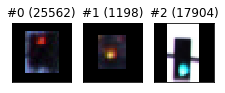

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

fig=plt.figure(figsize=(10, 10))
columns = 8
rows = int((n_classes-1)/columns+1)

for i in range(columns*rows):
    indices=[]
    for idx in range(len(y_train)):
           if y_train[idx]==i: indices.append(idx)
    
    if (len(indices)!=0):
        selected_index = indices[random.randint(0, len(indices))]
        image = X_train[selected_index].squeeze()

        fig.add_subplot(rows, columns, i+1)
        plt.title("#{} ({})".format(i, len(indices)))
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(image)

plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.image as mpimg
import skimage.transform

def RandomRotate(image):
    #img=img.copy()
    rnd=random.uniform(-10, 10)
    rnd+=np.sign(rnd)*5 # -15..-5 or 5..15 degree range
    #return img.copy()
    #print("rotate"+str(rnd))
    res=skimage.transform.rotate(image, rnd, mode='edge')
    return res

def modify_images(X_data):
    arr=X_data.copy()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    for idx in range(len(arr)):
        arr[idx] = cv2.cvtColor(arr[idx], cv2.COLOR_RGB2LAB)
        l_clahe = clahe.apply(arr[idx,:,:,0])
        arr[idx,:,:,0] = l_clahe
        m = np.max(arr[idx,:,:,0])
        if (m>1):
            arr[idx,:,:,0]=np.uint8(np.float32(arr[idx,:,:,0])*255/m)
        arr[idx] = cv2.cvtColor(arr[idx], cv2.COLOR_LAB2RGB)
    return (np.float32(arr[:,:,:,:])-128)/128
    #for idx in range(len(X_data)):
        #arr[idx] = cv2.cvtColor(X_data[idx], cv2.COLOR_RGB2HSV)
        #arr[idx,:, :, 0] = cv2.cvtColor(X_data[idx], cv2.COLOR_RGB2GRAY)
    #pure layer: return arr[:,:,:,1:2]
    #return (np.float32(arr[:,:,:,0:1])-128)/128
    #for hue: 0..180, and green is at 60, shift it to be at 0 instead of red, which jumps from 0 to 179
    #return (np.float32(((arr[:,:,:,0:1]-60)%180)-90)/90)
    
#X_test_mod =modify_images(X_test)
def EnsureMinimalClassCount(X, y):
    y_max = max(y)
    min_class_count = int(len(y)/(y_max+1)/2)
    print("minimal samples per class: {}".format(min_class_count))
    img_count=0
    for i in range(y_max+1):
        class_count = len(y[y==i])
        #indices=[]
        #for idx in range(len(y)):
        #    if y[idx]==i: indices.append(idx)
        if (class_count!=0 and class_count<min_class_count):
            duplication_num = int((min_class_count-1)/class_count)
            print("class {} count {} adding {} duplicates".format(i, class_count, duplication_num))
            source_X=X[y==i]
            source_y=y[y==i]
            for d in range(duplication_num):
                new_X = np.copy(source_X)
                for r in range(len(source_y)):
                    #new_X[r]=RandomRotate(source_X[r])
                    #mpimg.imsave('debug/rot{}_source.png'.format(img_count), source_X[r])
                    rnd=random.uniform(-10, 10)
                    rnd+=np.sign(rnd)*5 # -15..-5 or 5..15 degree range
                    res=skimage.transform.rotate(source_X[r], rnd, mode='edge')
                    new_X[r]=np.uint8(res*255)
                    #mpimg.imsave('debug/rot{}.png'.format(img_count), new_X[r])
                    #img_count+=1
                X = np.concatenate((X, new_X), axis=0)
                y = np.concatenate((y, source_y), axis=0)
    return X, y

#X_train, y_train = EnsureMinimalClassCount(X_train, y_train)

X_train_mod = modify_images(X_train)
X_valid_mod = modify_images(X_valid)

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

displayed_activation1 = None
displayed_activation2 = None

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    global displayed_activation1
    global displayed_activation2
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    F_W = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean=mu, stddev = sigma))
    F_b = tf.Variable(tf.zeros([6]))
    layer1 = tf.nn.conv2d(x, F_W, [1, 1, 1, 1], 'VALID') + F_b

    #  Activation.
    layer1 = tf.nn.relu(layer1)
    displayed_activation1 = layer1

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1pool =tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    F_W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev = sigma))
    F_b2 = tf.Variable(tf.Variable(tf.zeros([16])))
    layer2 = tf.nn.conv2d(layer1pool, F_W2, [1,1,1,1],'VALID') + F_b2
    
    # Activation.
    layer2 = tf.nn.relu(layer2)
    displayed_activation2 = layer2

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2pool =tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    layer2flat = tf.contrib.layers.flatten(layer2pool)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    F_W3 = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev = sigma))
    F_b3 = tf.Variable(tf.Variable(tf.zeros([120])))
    
    layer3 = tf.matmul(layer2flat, F_W3)
    layer3 = tf.nn.bias_add(layer3, F_b3)
    
    # Activation.
    layer3 = tf.nn.relu(layer3)
    layer3 = tf.nn.dropout(layer3, drop_keep)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    F_W4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev = sigma))
    F_b4 = tf.Variable(tf.Variable(tf.zeros([84])))
    
    layer4 = tf.matmul(layer3, F_W4)
    layer4 = tf.nn.bias_add(layer4, F_b4)
    
    # Activation.
    layer4 = tf.nn.relu(layer4)
    layer4 = tf.nn.dropout(layer4, drop_keep)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    F_W5 = tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev = sigma))
    F_b5 = tf.Variable(tf.Variable(tf.zeros([n_classes])))
    
    layer5 = tf.matmul(layer4, F_W5)
    layer5 = tf.nn.bias_add(layer5, F_b5, name='result')
    
    return layer5

C:\Users\Fable\miniconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Fable\miniconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Fable\miniconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Fable\miniconda3\envs\Int

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="input")
y = tf.placeholder(tf.int32, (None))
drop_keep = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)
rate = 0.001

EPOCHS = 5
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

optimizer_slow = tf.train.AdamOptimizer(learning_rate = rate/10)
training_operation_slow = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, drop_keep: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_mod)
    
    print("Training...")
    print()
    class prettyfloat(float):
        def __repr__(self):
            return "%0.3f" % self
    stats={"epocs":EPOCHS, "batch_size":BATCH_SIZE, "rate":rate, "acc":[], "tra":[]}
    best_accuracy = 0
    best_epoch = 0
    need_restore = False
    checkpoint_path='./early_stop_checkpoint'
    for i in range(EPOCHS):
        X_train_mod, y_train = shuffle(X_train_mod, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_mod[offset:end], y_train[offset:end]
            if (i>EPOCHS/2):
                sess.run(training_operation_slow, feed_dict={x: batch_x, y: batch_y, drop_keep: .5})
            else:
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, drop_keep: .5})
            
        validation_accuracy = evaluate(X_valid_mod, y_valid)
        if (validation_accuracy>best_accuracy):
            best_accuracy = validation_accuracy
            best_epoch = i
            saver.save(sess, checkpoint_path)
            need_restore=False
        else:
            need_restore=True
        
        print("EPOCH {} ...".format(i+1))
        calculate_training_accuracy=False
        if (calculate_training_accuracy):
            training_accuracy = evaluate(X_train_mod, y_train)
            print("Validation Accuracy = {:.3f} Training Accuracy = {:.3f}".format(validation_accuracy, training_accuracy))
            stats["tra"].append(prettyfloat(training_accuracy))
        else:
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        stats["acc"].append(prettyfloat(validation_accuracy))
        
        print()
    print(str(stats))
    if (need_restore):
        print("restoring from epoch {} accuracy {:.3f}".format(best_epoch, best_accuracy))
        saver.restore(sess, checkpoint_path)
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    frozen_graph = freeze_session(sess, output_names=["result"])

    tf.train.write_graph(frozen_graph, 'model', 'fablenet.pb', as_text=False)
    #test_accuracy = evaluate(modify_images(X_test), y_test)
    #print("Testing Accuracy = {:.3f}".format(test_accuracy))


Training...

EPOCH 1 ...
Validation Accuracy = 0.999

EPOCH 2 ...
Validation Accuracy = 0.999

EPOCH 3 ...
Validation Accuracy = 0.999

EPOCH 4 ...
Validation Accuracy = 1.000

EPOCH 5 ...
Validation Accuracy = 0.999

{'epocs': 5, 'batch_size': 128, 'rate': 0.001, 'acc': [0.999, 0.999, 0.999, 1.000, 0.999], 'tra': []}
restoring from epoch 3 accuracy 1.000
INFO:tensorflow:Restoring parameters from ./early_stop_checkpoint
Model saved
INFO:tensorflow:Froze 36 variables.
Converted 36 variables to const ops.
